# Dataset Information

The dataset contains **3 classes** of **50 instances each**, where each class refers to a type of iris plant.  
- One class is **linearly separable** from the other two.  
- The latter two classes are **NOT linearly separable** from each other.  

## Attribute Information:

1. **Sepal length** in cm  
2. **Sepal width** in cm  
3. **Petal length** in cm  
4. **Petal width** in cm  
5. **Class**:  
   - *Iris Setosa*  
   - *Iris Versicolour*  
   - *Iris Virginica*


# Import modules

In [42]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the dataset

In [43]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('iris.data', names=column_names)

In [44]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [46]:
df.info()
df['class'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Preprocessing

In [47]:
# check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

# Exploratory Data Analysis

<Axes: >

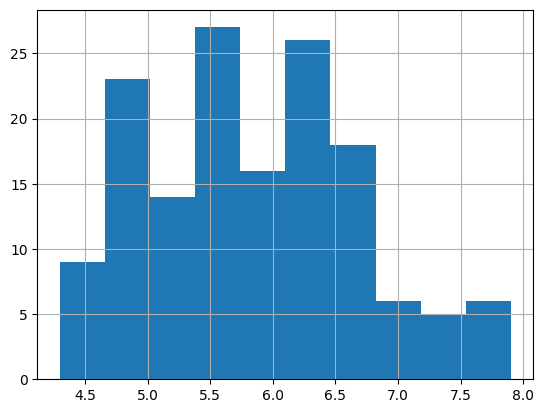

In [48]:
# histograms
df['sepal_length'].hist()

<Axes: >

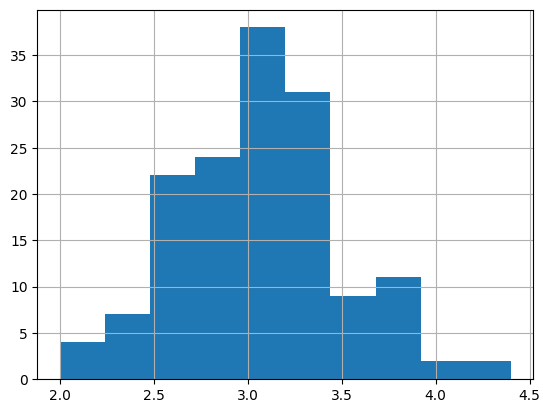

In [49]:
df['sepal_width'].hist()

<Axes: >

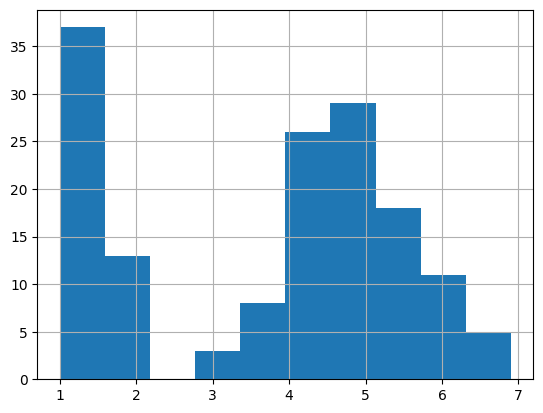

In [50]:
df['petal_length'].hist()

<Axes: >

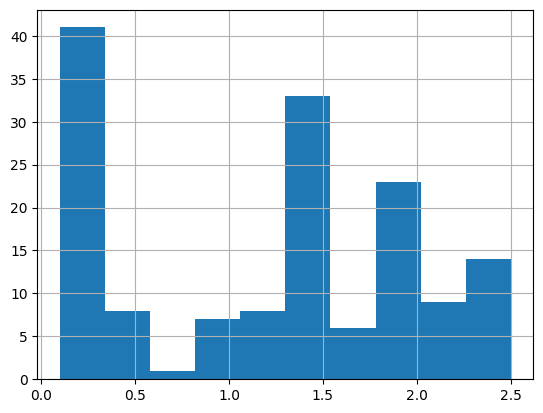

In [51]:
df['petal_width'].hist()

In [52]:
# scatterplot
colors = ['red', 'blue', 'green']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

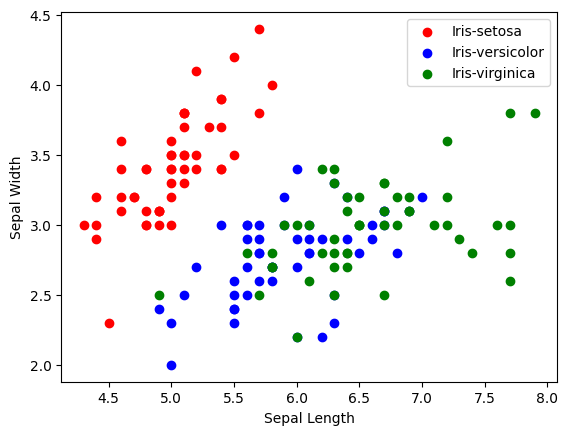

In [53]:
for i in range(3):
    x = df[df['class'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

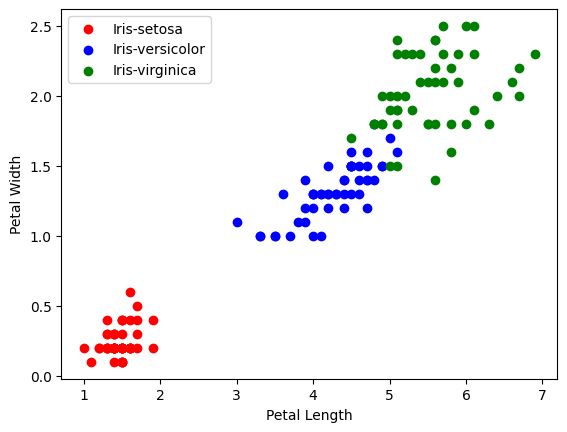

In [54]:
for i in range(3):
    x = df[df['class'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label = species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

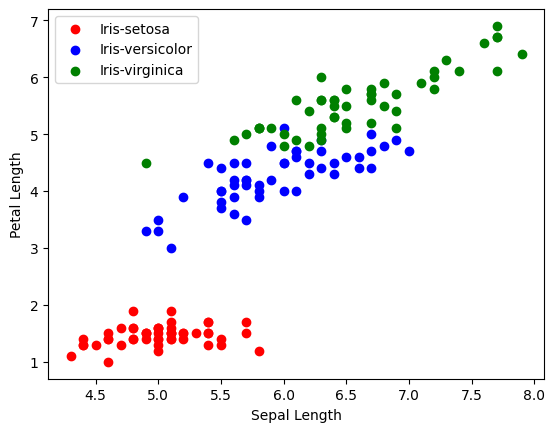

In [55]:
for i in range(3):
    x = df[df['class'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

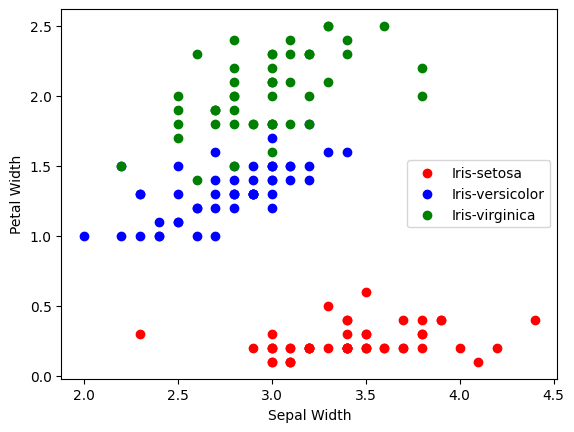

In [56]:
for i in range(3):
    x = df[df['class'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label = species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

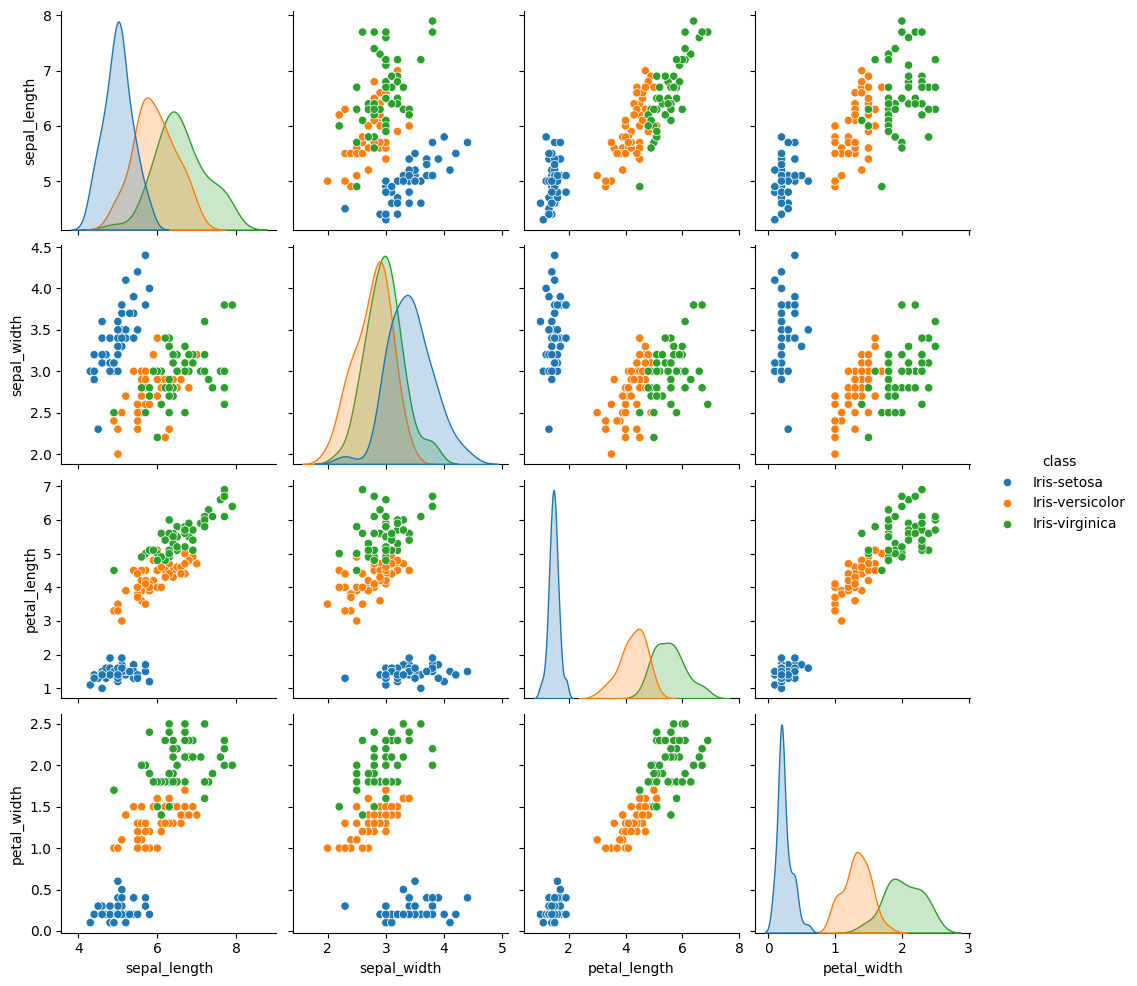

In [57]:
# pairplot
sns.pairplot(df, hue='class')

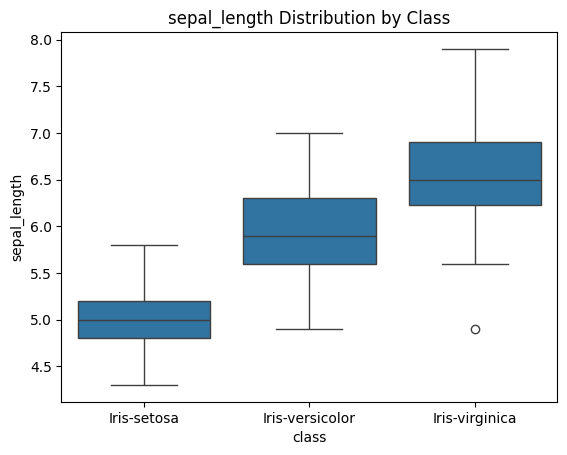

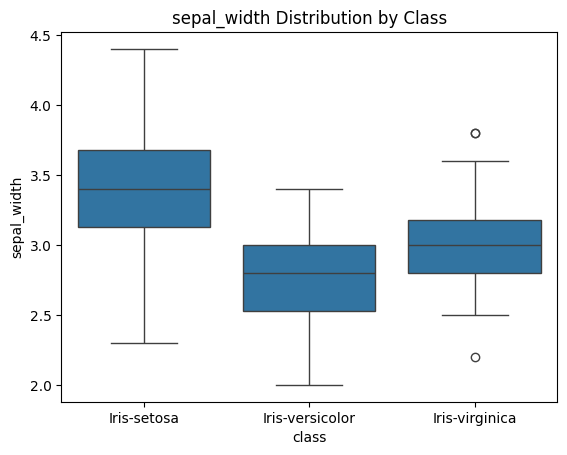

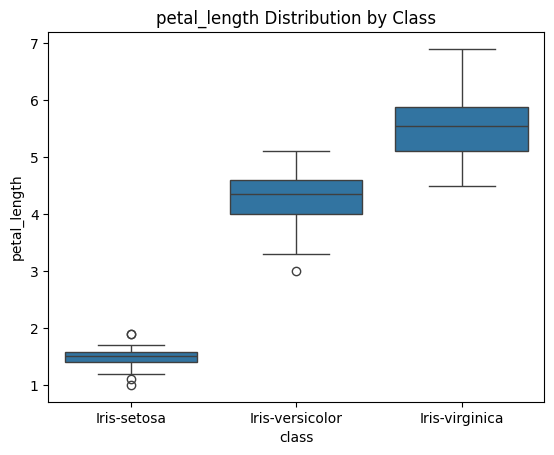

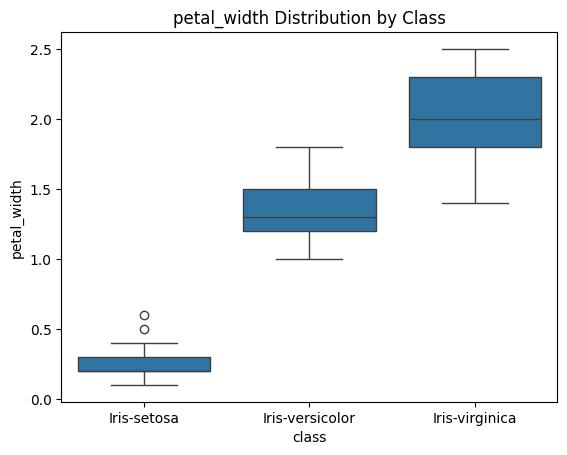

In [58]:
# box plot
for col in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    sns.boxplot(data=df, x='class', y=col)
    plt.title(f'{col} Distribution by Class')
    plt.show()

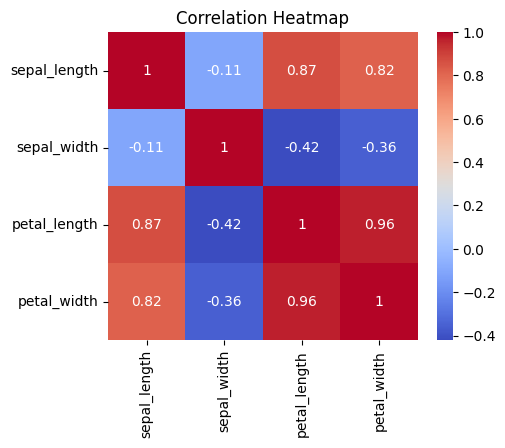

In [59]:
# Correlation matrix
# Compute correlation for numeric columns only
corr = df.select_dtypes(include=['float64', 'int64']).corr()

# Plot heatmap
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [60]:
# Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [61]:
df['class'] = le.fit_transform(df['class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [62]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['class'])
Y = df['class']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [66]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [67]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [68]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [72]:
# Predict the target values for the test data
y_pred = model.predict(x_test)


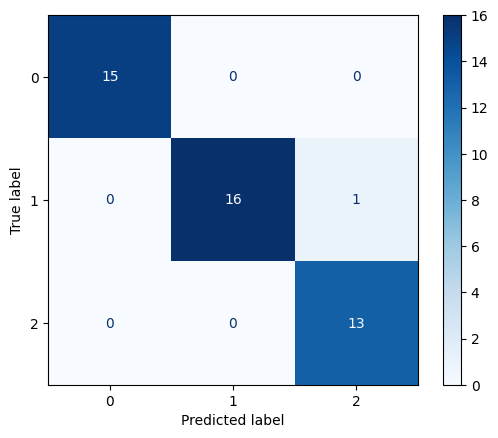

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")


In [74]:
from sklearn.metrics import classification_report

# Generate classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        17
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



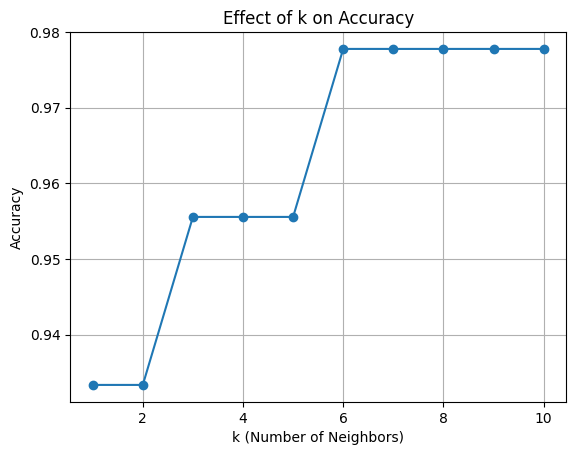

In [36]:
from sklearn.metrics import accuracy_score

# Test different values of k and store accuracies
accuracies = []
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot k vs. accuracy
plt.plot(range(1, 11), accuracies, marker="o")
plt.title("Effect of k on Accuracy")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [37]:
# Train the final model with k=6
final_model = KNeighborsClassifier(n_neighbors=6)
final_model.fit(x_train, y_train)

# Make predictions
y_final_pred = final_model.predict(x_test)

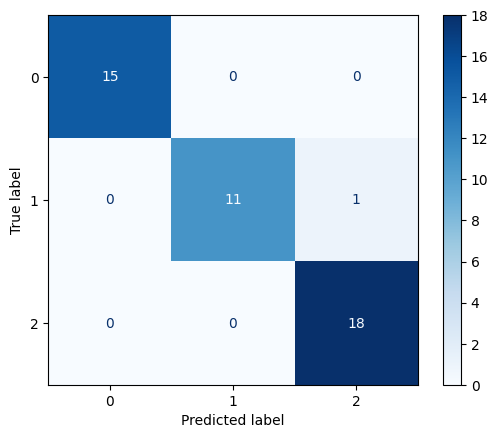

In [38]:
# Evaluate accuracy
final_accuracy = accuracy_score(y_test, y_final_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_final_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot(cmap="Blues")

In [43]:
print(f"Final Accuracy with k=6: {final_accuracy * 100:.2f}%")

Final Accuracy with k=6: 97.78%
